In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from rpn.rpn_multi import MultiRPN
from pathlib import Path
import pandas as pd

from rpn.rpn import RPN
from datetime import datetime
from matplotlib.dates import date2num, DateFormatter, MonthLocator


In [3]:
i0, j0 = 231, 105

In [7]:
samples_dir = Path("../Samples")

files_of_interest = []

for monthdir in samples_dir.iterdir():
    files_of_interest.extend([str(f) for f in monthdir.iterdir()  if not f.name.endswith(8 * "0" + "p") and f.name.startswith("pm")])


print(len(files_of_interest))




180


In [8]:
r0 = RPN(files_of_interest[0][:-9] + 8 * "0" + "p")
print(r0.get_list_of_varnames())

for v in r0.get_list_of_varnames():
    
    if v in [">>", "^^", "HY"]:
        continue
    print("{} = {}".format(v, r0.get_first_record_for_name(v)[i0, j0]))

r0.close()

['8L' '>>' 'CBF' 'CLAY' 'CLDP' 'COB' 'DX' 'FAA' 'FLDR' 'GWRT' 'HY' 'LB'
 'LF1' 'LKAR' 'LKID' 'LKOU' 'MABF' 'MG' 'ML' 'SAND' 'SLOP' 'STBM' '^^']
8L = 0.10000000149011612
CBF = 5.4457435908261687e-05
CLAY = 8.0
CLDP = 10.0
COB = 9.992007221626409e-14
DX = 81771312.0
FAA = 6663.6982421875
FLDR = 1.0
GWRT = 1468799.875
LB = 10.0
LF1 = 0.033599853515625
LKAR = 2097152.0
LKID = -1.0
LKOU = 0.0
MABF = 0.009999999776482582
MG = 0.972198486328125
ML = 0.034698486328125
SAND = 77.0
SLOP = 0.003448486328125
STBM = 17124064.0


In [52]:
# get list of available variables
r1 = RPN(files_of_interest[0])
print(r1.get_list_of_varnames())
r1.close()

['>>' 'AB' 'AD' 'AH' 'AI' 'AL' 'AR' 'AS' 'AU' 'AV' 'BG' 'C3' 'C9' 'CLDP'
 'D2' 'D5' 'DN' 'E8' 'F5' 'FB' 'FC' 'FI' 'FN' 'FV' 'G4' 'GLOU' 'GWDI'
 'GWST' 'H' 'H5' 'H7' 'HT' 'HY' 'I0' 'I1' 'I2' 'I4' 'I5' 'I6' 'I7' 'I8'
 'I9' 'IMAV' 'INTF' 'J8' 'J9' 'L1' 'LC' 'LD' 'LJ' 'LM' 'MS' 'N3' 'N4' 'N7'
 'NC' 'NEM1' 'NEM2' 'NEM3' 'NEM4' 'NEM5' 'NEM6' 'NEM7' 'NEM8' 'O3' 'PR'
 'QD' 'RT' 'S2' 'S5' 'S6' 'S7' 'S8' 'SD' 'SK' 'STFA' 'STFL' 'SWSL' 'SWSR'
 'SWST' 'T5' 'T9' 'TDR' 'TDRA' 'TJ' 'TN' 'TRAF' 'TRUN' 'U1' 'U3' 'UD'
 'UPIN' 'UVAV' 'UVMX' 'V3' 'VD' 'W7C' 'Y3' '^^']


In [9]:
r = MultiRPN(files_of_interest)

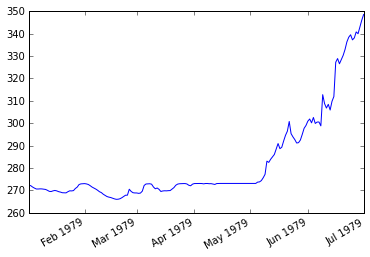

In [30]:
# Soil temperature
data = r.get_all_time_records_for_name_and_level("I0", level=1)
sorted_dates = list(sorted(data))
ts_I0 = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_I0.plot()

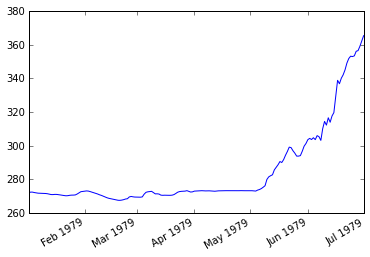

In [87]:
# Soil temperature
data = r.get_all_time_records_for_name_and_level("I0", level=2)
sorted_dates = list(sorted(data))
ts_I0_2 = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_I0_2.plot()

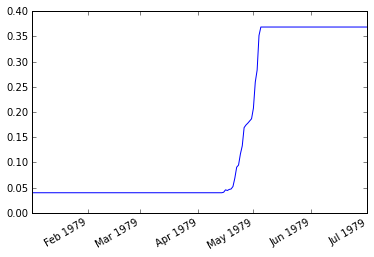

In [47]:
# soil moisture fraction (liq)
data = r.get_all_time_records_for_name_and_level("I1", level=1)
sorted_dates = list(sorted(data))
ts_I1 = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_I1.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

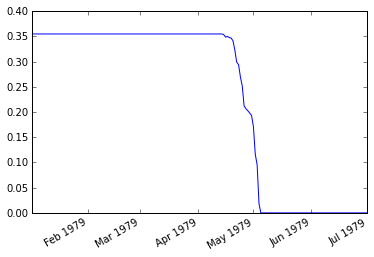

In [48]:
# soil moisture fraction (frozen)
data = r.get_all_time_records_for_name_and_level("I2", level=1)
sorted_dates = list(sorted(data))
ts_I2 = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_I2.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

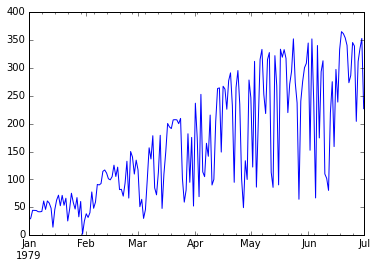

In [35]:
# vis flux towards ground
data = r.get_all_time_records_for_name_and_level("N4", level=-1)
sorted_dates = list(sorted(data))
ts_FB = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_FB.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

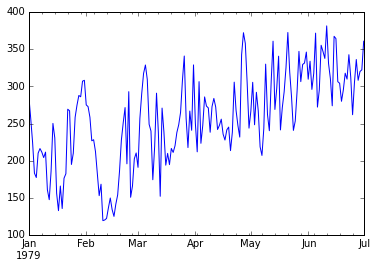

In [36]:
# longwave flux towards ground
data = r.get_all_time_records_for_name_and_level("AD", level=-1)
sorted_dates = list(sorted(data))
ts_AD = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_AD.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

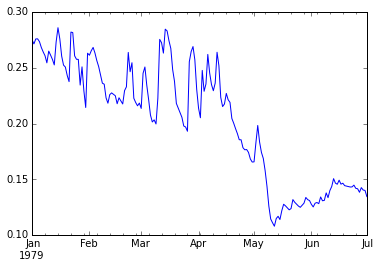

In [26]:
# Albedo

data = r.get_all_time_records_for_name_and_level("AL", level=5)
sorted_dates = list(sorted(data))
ts_AL_5 = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_AL_5.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

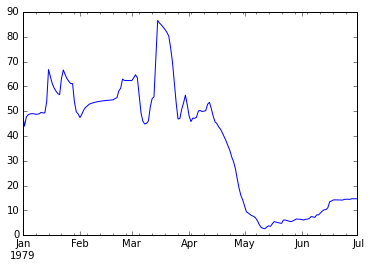

In [37]:
# Snow depth
data = r.get_all_time_records_for_name_and_level("SD", level=5)
sorted_dates = list(sorted(data))
ts_SD = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_SD.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

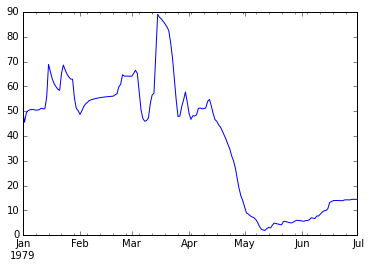

In [55]:
# Snow depth
data = r.get_all_time_records_for_name_and_level("SD", level=1)
sorted_dates = list(sorted(data))
ts_SD1 = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_SD1.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

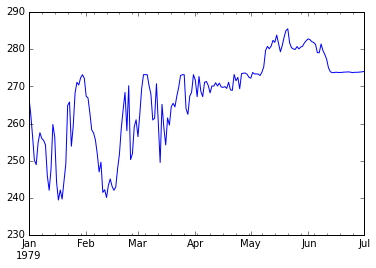

In [59]:
# Surface temperature
data = r.get_all_time_records_for_name_and_level("J8", level=-1)
sorted_dates = list(sorted(data))
ts_J8 = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_J8.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

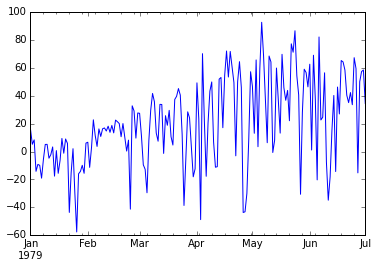

In [39]:
# Sensible heat flux
data = r.get_all_time_records_for_name_and_level("AH", level=-1)
sorted_dates = list(sorted(data))
ts_AH = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_AH.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

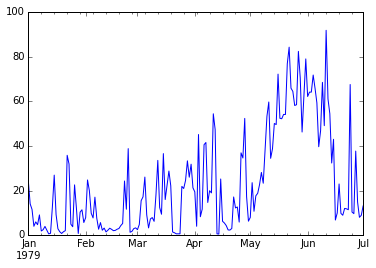

In [40]:
#latent heat flux
data = r.get_all_time_records_for_name_and_level("AV", level=-1)
sorted_dates = list(sorted(data))
ts_AV = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_AV.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

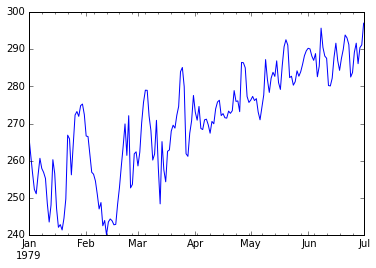

In [41]:
#2m air temperature
data = r.get_all_time_records_for_name_and_level("TJ", level=-1)
sorted_dates = list(sorted(data))
ts_TJ = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_TJ.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

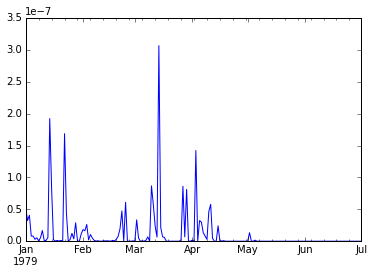

In [46]:
#Snowfall
data = r.get_all_time_records_for_name_and_level("U3", level=-1)
sorted_dates = list(sorted(data))
ts_SN = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_SN.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

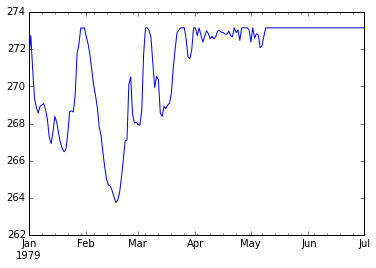

In [44]:
#Snow temperature
data = r.get_all_time_records_for_name_and_level("TN", level=-1)
sorted_dates = list(sorted(data))
ts_TN = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_TN.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

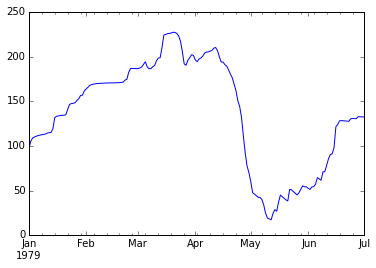

In [45]:
#SWE
data = r.get_all_time_records_for_name_and_level("I5", level=-1)
sorted_dates = list(sorted(data))
ts_I5 = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_I5.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

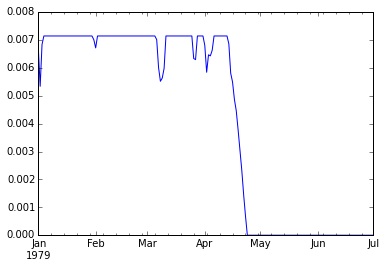

In [49]:
#Snow fractional coverage
data = r.get_all_time_records_for_name_and_level("S6", level=-1)
sorted_dates = list(sorted(data))
ts_S6 = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_S6.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

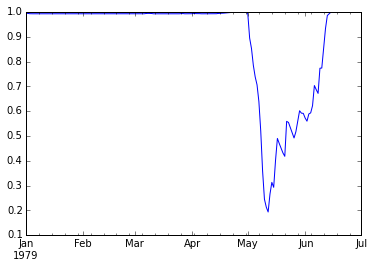

In [62]:
#Snow fractional coverage
data = r.get_all_time_records_for_name_and_level("S5", level=-1)
sorted_dates = list(sorted(data))
ts_S5 = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_S5.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

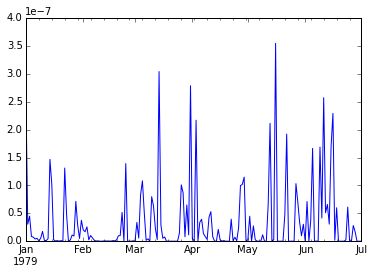

In [54]:
#PR
data = r.get_all_time_records_for_name_and_level("PR", level=-1)
sorted_dates = list(sorted(data))
ts_PR = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_PR.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

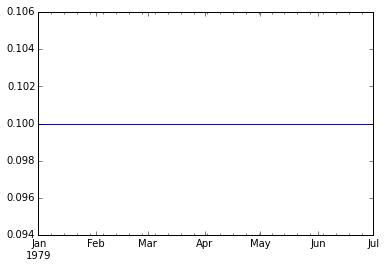

In [60]:
#D2
data = r.get_all_time_records_for_name_and_level("D2", level=-1)
sorted_dates = list(sorted(data))
ts_D2 = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_D2.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

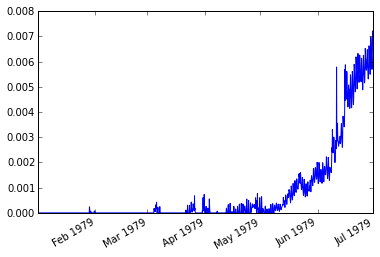

In [61]:
#energy or water from snow melt
data = r.get_all_time_records_for_name_and_level("MS", level=-1)
sorted_dates = list(sorted(data))
ts_MS = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_MS.plot()

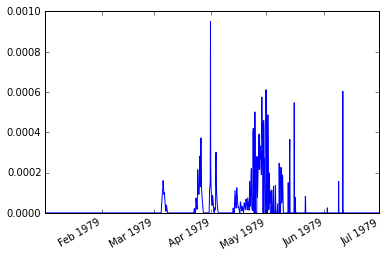

In [64]:
# Surface runoff
data = r.get_all_time_records_for_name_and_level("TRAF", level=1)
sorted_dates = list(sorted(data))
ts_TRAF = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_TRAF.plot()

In [10]:
# Temperature profile

profile_I0 = r.get_4d_field("I0")


In [11]:
level_widths = [
    0.1, 0.2, 0.3, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
    1.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

depths = np.cumsum(level_widths)

In [12]:
pdates = list(sorted(profile_I0))
plevel_inds = list(sorted(profile_I0[pdates[0]]))

In [13]:
profile_I0_arr = np.asarray([[profile_I0[ti][li][i0, j0] for li in plevel_inds] for ti in pdates])

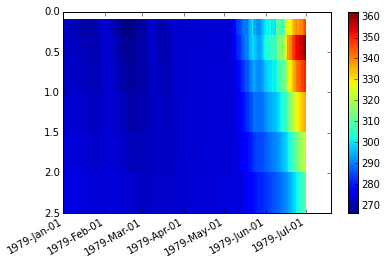

In [14]:

lowest_level_index = 6

pdates_num = date2num(pdates)
depth_2d, pdates_num_2d = np.meshgrid(depths[:lowest_level_index + 1], pdates_num)


im = plt.pcolormesh(pdates_num_2d, depth_2d, profile_I0_arr[:, :lowest_level_index + 1])
ax = plt.gca()
ax.invert_yaxis()
ax.xaxis.set_major_formatter(DateFormatter("%Y-%b-%d"))
ax.xaxis.set_major_locator(MonthLocator(bymonthday=1))
plt.gcf().autofmt_xdate()
plt.colorbar()


In [ ]:
r.close()

In [16]:
# Take the data from a good simulation for the same point

samples_ok_p = Path("/home/huziy/current_project/Output/GL_Hostetler/Samples")
pm_files_of_interest_ok = []

for monthdir in samples_ok_p.iterdir():
    if monthdir.name[:-2].endswith("1979"):
        pm_files_of_interest_ok.extend([str(f) for f in monthdir.iterdir() if f.name.startswith("pm") and not f.name.endswith(8 * "0" + "p")])


r_ok = MultiRPN(pm_files_of_interest_ok)

In [24]:
r0 = RPN(pm_files_of_interest_ok[0][:-9] + 8 * "0" + "p")
print(r0.get_list_of_varnames())

for v in r0.get_list_of_varnames():
    
    if v in [">>", "^^", "HY"]:
        continue
    print("{} = {}".format(v, r0.get_first_record_for_name(v)[i0, j0]))

r0.close()

['8L' '>>' 'CBF' 'CLAY' 'CLDP' 'COB' 'DX' 'FAA' 'FLDR' 'GWRT' 'HY' 'LB'
 'LF1' 'LKAR' 'LKID' 'LKOU' 'MABF' 'MG' 'ML' 'SAND' 'SLOP' 'STBM' '^^']
8L = 0.10000000149011612
CBF = 5.4457435908261687e-05
CLAY = 8.0
CLDP = 10.0
COB = 9.992007221626409e-14
DX = 81771296.0
FAA = 6832.5126953125
FLDR = 4.0
GWRT = 1468799.875
LB = 10.0
LF1 = 0.033599853515625
LKAR = 2097152.0
LKID = -1.0
LKOU = 0.0
MABF = 0.009999999776482582
MG = 0.96527099609375
ML = 0.034698486328125
SAND = 77.0
SLOP = 0.003448486328125
STBM = 17556216.0


In [25]:
# Temperature profile

profile_I0_ok = r_ok.get_4d_field("I0")
pdates_ok = list(sorted(profile_I0_ok))
profile_I0_arr_ok = np.asarray([[profile_I0_ok[ti][li][i0, j0] for li in plevel_inds] for ti in pdates_ok])

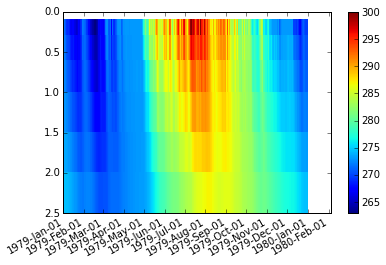

In [19]:
lowest_level_index = 6

pdates_num_ok = date2num(pdates_ok)
depth_2d_ok, pdates_num_2d_ok = np.meshgrid(depths[:lowest_level_index + 1], pdates_num_ok)


im = plt.pcolormesh(pdates_num_2d_ok, depth_2d_ok, profile_I0_arr_ok[:, :lowest_level_index + 1])
ax = plt.gca()
ax.invert_yaxis()
ax.xaxis.set_major_formatter(DateFormatter("%Y-%b-%d"))
ax.xaxis.set_major_locator(MonthLocator(bymonthday=1))
plt.gcf().autofmt_xdate()
plt.colorbar()

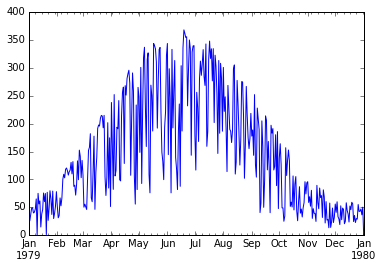

In [20]:
# vis flux towards ground
data = r_ok.get_all_time_records_for_name_and_level("N4", level=-1)
sorted_dates = list(sorted(data))
ts_N4_ok = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_N4_ok.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

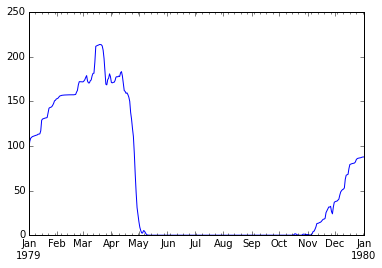

In [21]:
# SWE
data = r_ok.get_all_time_records_for_name_and_level("I5", level=-1)
sorted_dates = list(sorted(data))
ts_I5_ok = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_I5_ok.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

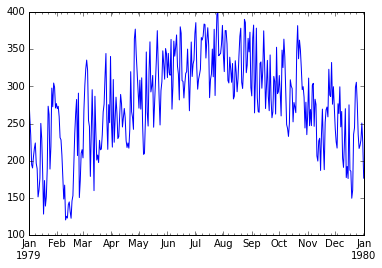

In [22]:
# AD
data = r_ok.get_all_time_records_for_name_and_level("AD", level=-1)
sorted_dates = list(sorted(data))
ts_AD_ok = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_AD_ok.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()

In [ ]:
# AL
data = r_ok.get_all_time_records_for_name_and_level("AL", level=-1)
sorted_dates = list(sorted(data))
ts_AD_ok = pd.Series(index=sorted_dates, data=[data[d][i0, j0] for d in sorted_dates])
ts_AD_ok.groupby(lambda d: datetime(d.year, d.month, d.day)).mean().plot()